In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('/kaggle/input/india-road-accident-dataset-predictive-analysis/accident_prediction_india.csv')

In [34]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [35]:
df.shape

(3000, 22)

In [36]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [38]:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [39]:
df.isnull().sum()

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [40]:
df.duplicated().sum()

0

# EDA

In [41]:
df['Accident Severity'].value_counts(normalize=True)

Accident Severity
Minor      0.344667
Fatal      0.328333
Serious    0.327000
Name: proportion, dtype: float64

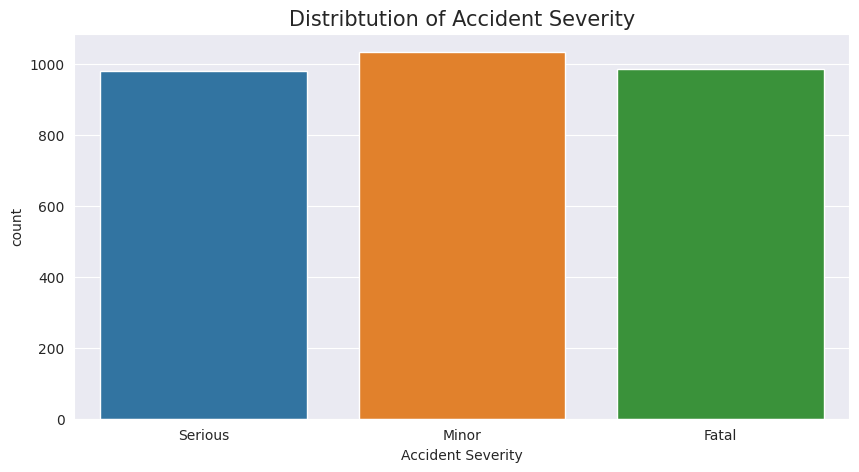

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x=df['Accident Severity'])
plt.title('Distribtution of Accident Severity', fontsize=15)
plt.show()

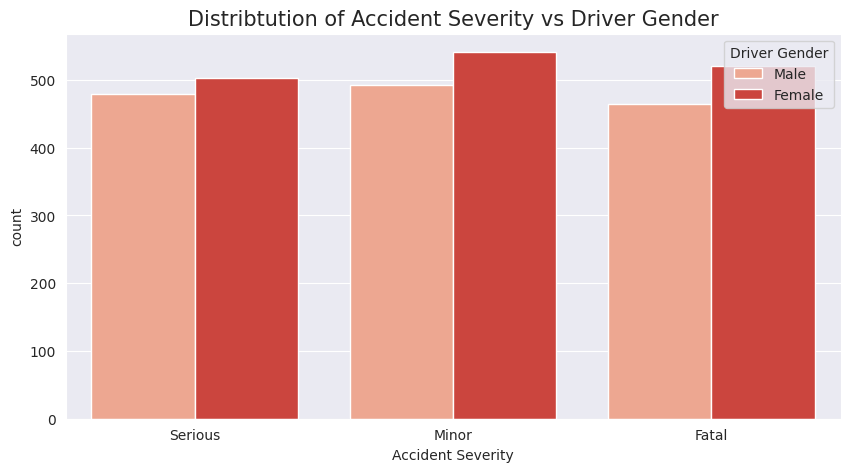

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Accident Severity'], hue=df['Driver Gender'], palette='Reds')
plt.title('Distribtution of Accident Severity vs Driver Gender', fontsize=15)
plt.show()

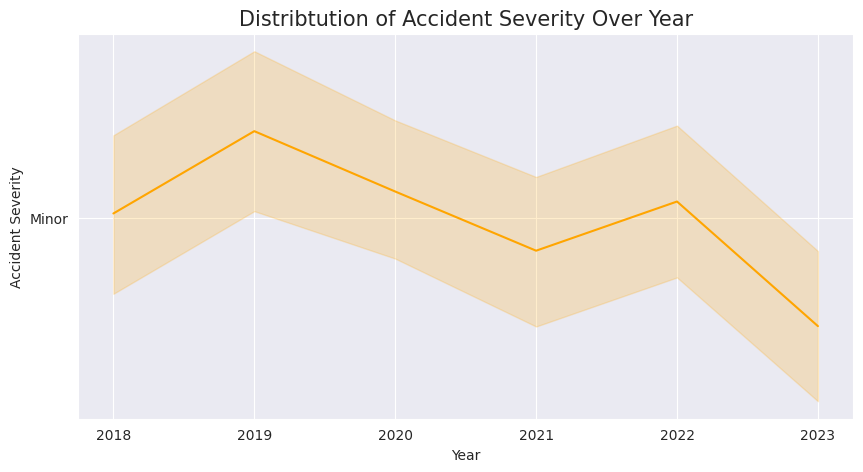

In [44]:
plt.figure(figsize=(10,5))
plt.title('Distribtution of Accident Severity Over Year', fontsize=15)
sns.lineplot(x=df['Year'], y=df['Accident Severity'], color='orange')
plt.show()

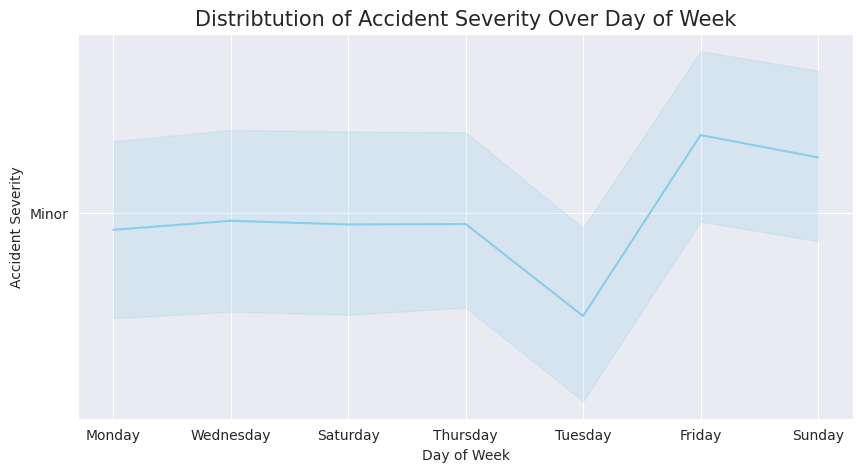

In [45]:
plt.figure(figsize=(10,5))
plt.title('Distribtution of Accident Severity Over Day of Week', fontsize=15)
sns.lineplot(x=df['Day of Week'], y=df['Accident Severity'], color='skyblue')
plt.show()

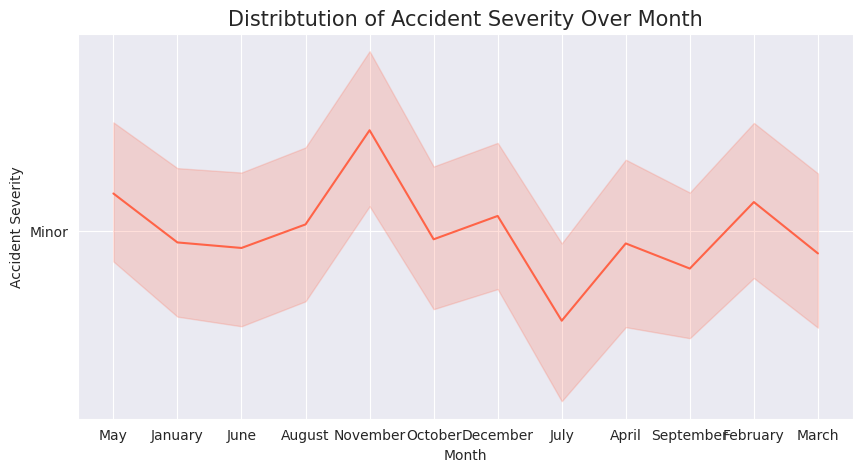

In [46]:
plt.figure(figsize=(10,5))
plt.title('Distribtution of Accident Severity Over Month', fontsize=15)
sns.lineplot(x=df['Month'], y=df['Accident Severity'], color='tomato')
plt.show()

In [47]:
df['Vehicle Type Involved'].value_counts()

Vehicle Type Involved
Truck            449
Auto-Rickshaw    449
Bus              442
Two-Wheeler      427
Cycle            421
Pedestrian       419
Car              393
Name: count, dtype: int64

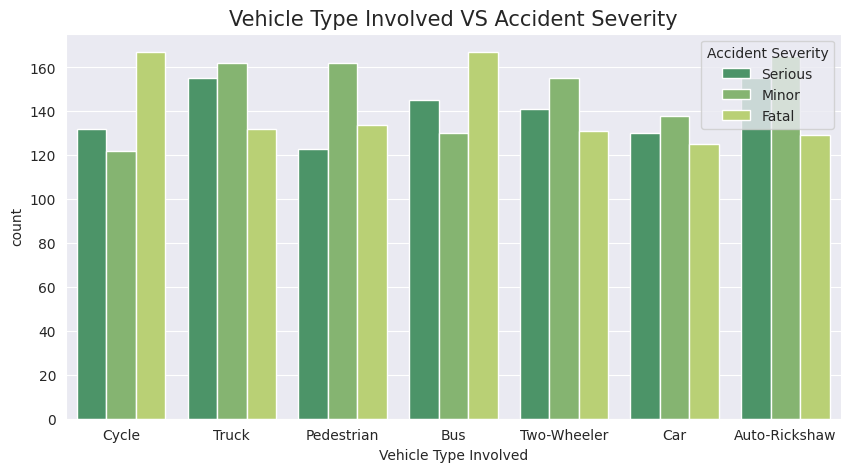

In [48]:
plt.figure(figsize=(10,5))
plt.title('Vehicle Type Involved VS Accident Severity', fontsize=15)
sns.countplot(x=df['Vehicle Type Involved'],hue=df['Accident Severity'], palette='summer')
plt.show()

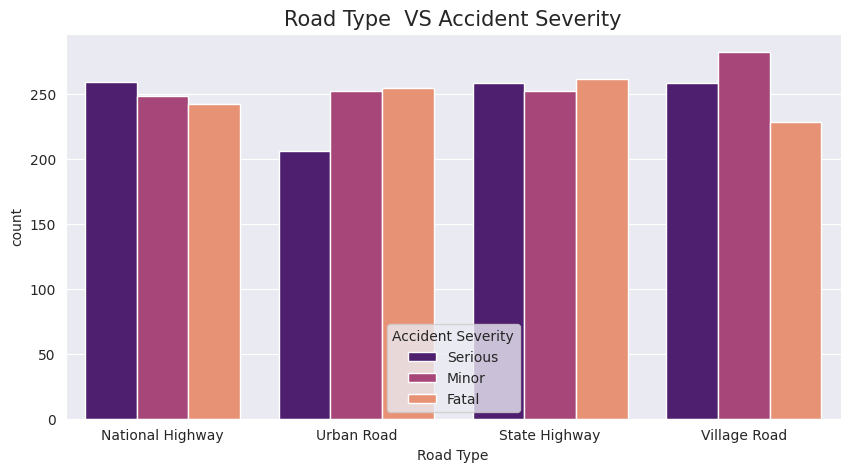

In [49]:
plt.figure(figsize=(10,5))
plt.title('Road Type  VS Accident Severity', fontsize=15)
sns.countplot(x=df['Road Type'],hue=df['Accident Severity'], palette='magma')
plt.show()

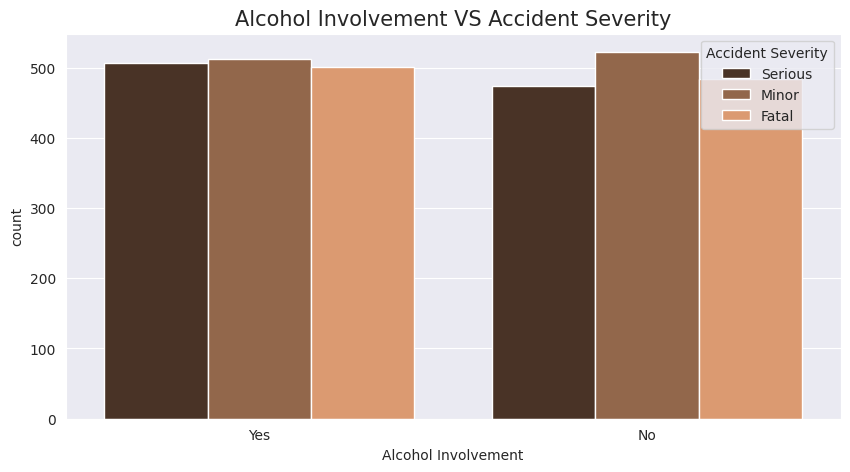

In [50]:
plt.figure(figsize=(10,5))
plt.title('Alcohol Involvement VS Accident Severity', fontsize=15)
sns.countplot(x=df['Alcohol Involvement'],hue=df['Accident Severity'], palette='copper')
plt.show()

In [51]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


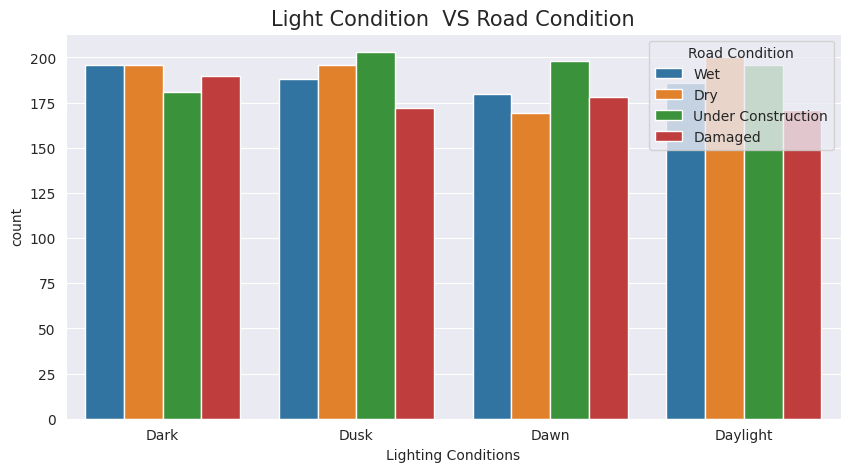

In [52]:
plt.figure(figsize=(10,5))
plt.title('Light Condition  VS Road Condition', fontsize=15)
sns.countplot(x=df['Lighting Conditions'], hue=df['Road Condition'])
plt.show()

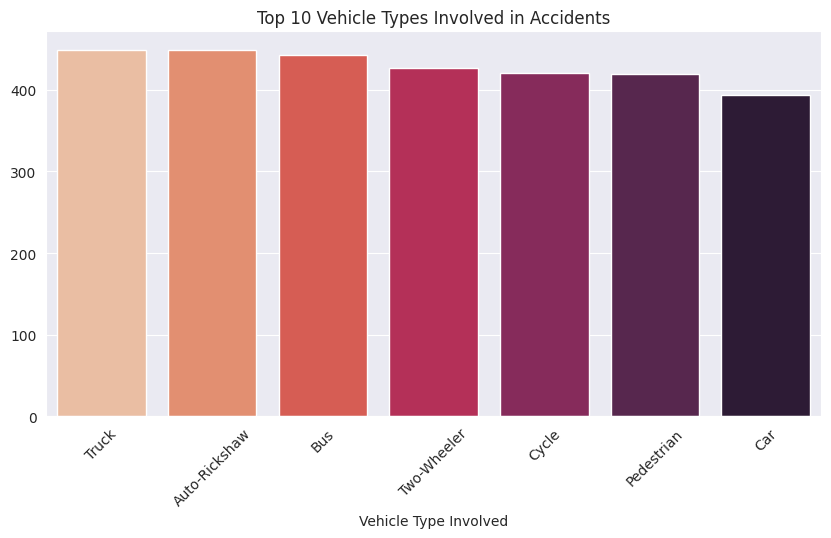

In [53]:
plt.figure(figsize=(10,5))
top_vehicles = df["Vehicle Type Involved"].value_counts().nlargest(10)
sns.barplot(x=top_vehicles.index, y=top_vehicles.values, palette="rocket_r")
plt.xticks(rotation=45)
plt.title("Top 10 Vehicle Types Involved in Accidents")
plt.show()

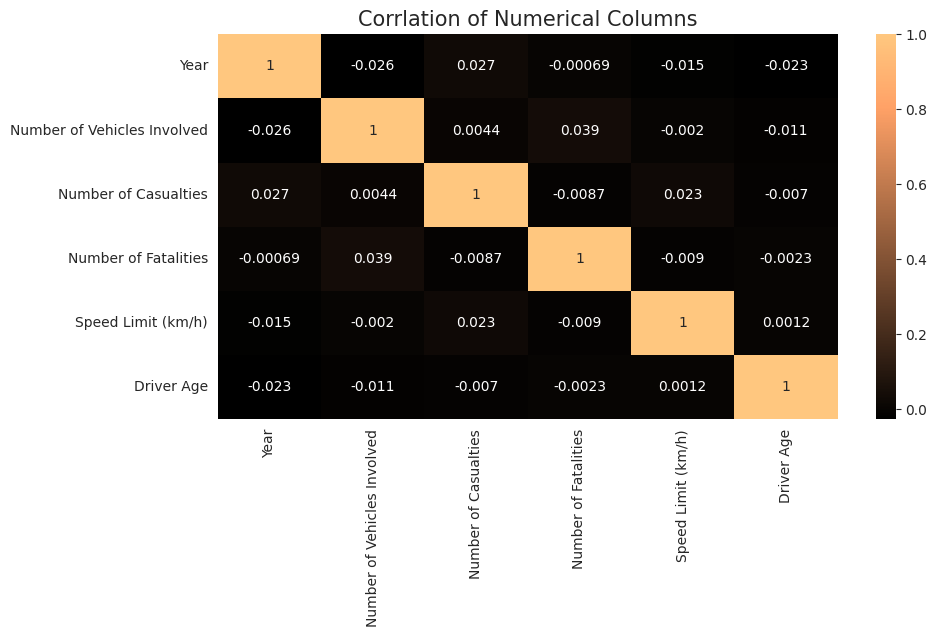

In [54]:
plt.figure(figsize=(10,5))
plt.title('Corrlation of Numerical Columns', fontsize=15)
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), cmap='copper', annot=True)
plt.show()

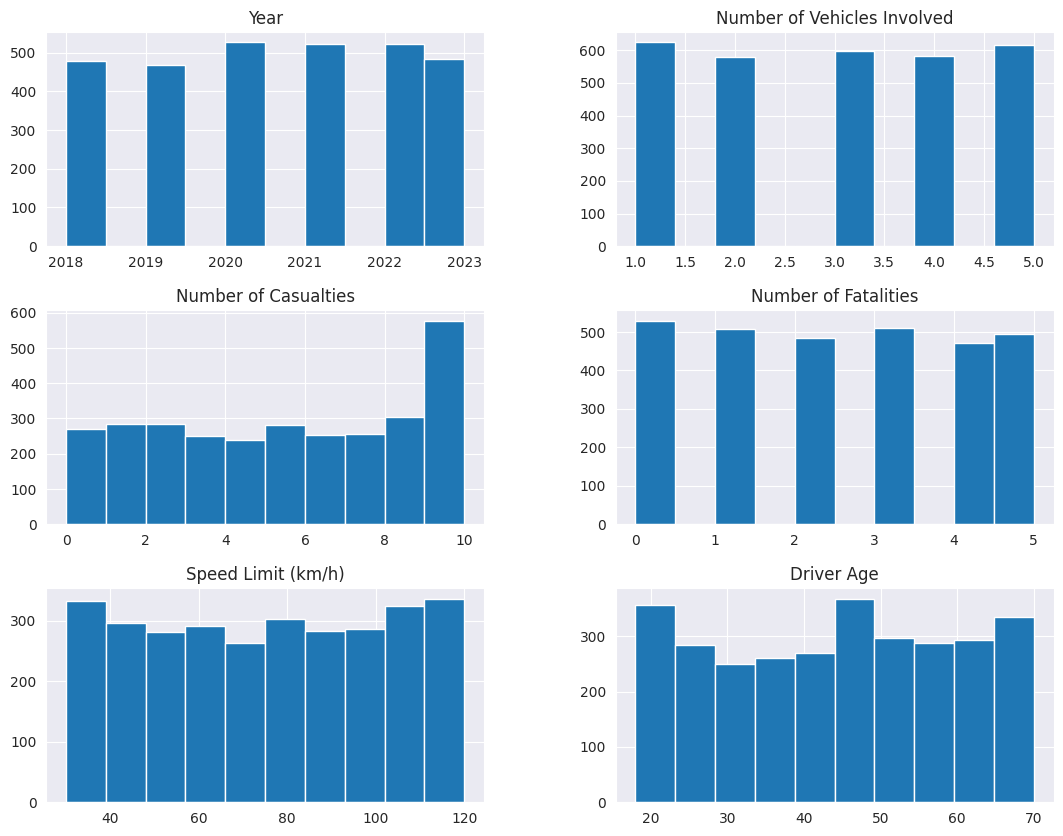

In [55]:
num_df.hist(figsize=(13,10))
plt.show()

In [56]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [58]:
le = LabelEncoder()

for col in ['State Name', 'City Name', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity',
       'Vehicle Type Involved',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence',
       'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details']:
    df[col] =  le.fit_transform(df[col])

In [59]:
X = df.drop(columns='Accident Severity')
y = df['Accident Severity']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 21)
(2400,)
(600, 21)
(600,)


# Model Building

In [61]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    'Adaboost Classifier': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

In [62]:
results = []
for name, model in models.items():
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    score = accuracy_score(y_test, y_preds)
    pre = precision_score(y_test, y_preds, average='macro') 
    
    print(f"\n{name} Performance:")
    print("Accuracy:", score)
    print("Precision Score:", pre)
   
    
    results.append({
        'Model': name,
        'Accuracy': score,
        'Precision': pre
    })
    results_df = pd.DataFrame(results)

print("\nModel Evaluation Summary:")
results_df   
 


Logistic Regression Performance:
Accuracy: 0.31833333333333336
Precision Score: 0.3099867877980053

Random Forest Performance:
Accuracy: 0.34833333333333333
Precision Score: 0.34752321141915044

Bagging Classifier Performance:
Accuracy: 0.33166666666666667
Precision Score: 0.3294498209453931

Adaboost Classifier Performance:
Accuracy: 0.36333333333333334
Precision Score: 0.3654685839614326

KNN Performance:
Accuracy: 0.3016666666666667
Precision Score: 0.301826262215482

Model Evaluation Summary:


,Model,Accuracy,Precision
0,Logistic Regression,0.318333,0.309987
1,Random Forest,0.348333,0.347523
2,Bagging Classifier,0.331667,0.329450
3,Adaboost Classifier,0.363333,0.365469
4,KNN,0.301667,0.301826


# Please Upvote!!